In [6]:
import os
import glob
import pandas as pd
all_files = glob.glob("redditData/*.csv")

In [7]:
redditData0 = []
for idx,filename in enumerate(all_files):
    data = pd.read_csv(filename, index_col=None)
    redditData0.append(data)

In [8]:
redditData = pd.concat(redditData0, axis=0)[["score","body","created"]]

In [9]:
redditData = redditData.dropna()

In [10]:
redditData = redditData[redditData['body'] != '\u200b']
redditData = redditData[redditData['body'] != '\u200c']

In [11]:
import datetime as dt

seconds = redditData["created"] # Generating test data

start = dt.datetime.utcfromtimestamp(0) # You need a reference point GMT+0

datetime_series = seconds.astype('timedelta64[s]') + start

redditData["created_date"] = datetime_series.dt.date #in GMT+0
redditData["created_time"] = datetime_series.dt.time #in GMT+0

In [12]:
redditData['created_datetime'] = pd.to_datetime(redditData['created_date'].astype("str") + ' ' + redditData['created_time'].astype("str"))
ns5min=5*60*1000000000   # 5 minutes in nanoseconds 
redditData['created_datetime_5m'] = pd.to_datetime(((redditData.created_datetime.astype(np.int64) // ns5min + 1 ) * ns5min - 1000000)).astype('str')
ns30min=30*60*1000000000   # 30 minutes in nanoseconds 
redditData['created_datetime_30m'] = pd.to_datetime(((redditData.created_datetime.astype(np.int64) // ns30min + 1 ) * ns30min - 1000000)).astype('str')
ns60min=60*60*1000000000   # 30 minutes in nanoseconds 
redditData['created_datetime_60m'] = pd.to_datetime(((redditData.created_datetime.astype(np.int64) // ns60min + 1 ) * ns60min - 1000000)).astype('str')

redditData

,score,body,created,created_date,created_time,created_datetime,created_datetime_5m,created_datetime_30m,created_datetime_60m
0,1,"[Monthly Skeptics Discussion - February, 2020]...",1.585700e+09,2020-04-01,00:16:38,2020-04-01 00:16:38,2020-04-01 00:19:59.999,2020-04-01 00:29:59.999,2020-04-01 00:59:59.999
1,12,Tpt forming a double bottom.\n\nI'll show myse...,1.585704e+09,2020-04-01,01:15:46,2020-04-01 01:15:46,2020-04-01 01:19:59.999,2020-04-01 01:29:59.999,2020-04-01 01:59:59.999
2,5,Is it possible to regularly earn $1500 a month...,1.585753e+09,2020-04-01,14:59:18,2020-04-01 14:59:18,2020-04-01 14:59:59.999,2020-04-01 14:59:59.999,2020-04-01 14:59:59.999
3,5,Blood in the streets...\n\nVampires' banquet.\...,1.585755e+09,2020-04-01,15:29:24,2020-04-01 15:29:24,2020-04-01 15:29:59.999,2020-04-01 15:29:59.999,2020-04-01 15:59:59.999
4,5,"Thread opened 9 hours ago, only 16 comments? W...",1.585736e+09,2020-04-01,10:16:06,2020-04-01 10:16:06,2020-04-01 10:19:59.999,2020-04-01 10:29:59.999,2020-04-01 10:59:59.999
...,...,...,...,...,...,...,...,...,...
5807,1,"When i'll enter again, i'll definetely buy som...",1.652106e+09,2022-05-09,14:27:11,2022-05-09 14:27:11,2022-05-09 14:29:59.999,2022-05-09 14:29:59.999,2022-05-09 14:59:59.999
5808,1,Not worth the risk imo but that’s your money s...,1.652163e+09,2022-05-10,06:04:21,2022-05-10 06:04:21,2022-05-10 06:04:59.999,2022-05-10 06:29:59.999,2022-05-10 06:59:59.999
5809,1,LoL 🤣,1.652120e+09,2022-05-09,18:12:55,2022-05-09 18:12:55,2022-05-09 18:14:59.999,2022-05-09 18:29:59.999,2022-05-09 18:59:59.999
5810,1,well you're just causing fud and its annoying,1.652108e+09,2022-05-09,14:56:18,2022-05-09 14:56:18,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999


In [13]:
redditData.pivot_table(index='created_date', aggfunc=[len])

len                                                \
              body created created_datetime created_datetime_30m   
created_date                                                       
2020-01-01     124     124              124                  124   
2020-01-02     238     238              238                  238   
2020-01-03     209     209              209                  209   
2020-01-04     175     175              175                  175   
2020-01-05     135     135              135                  135   
...            ...     ...              ...                  ...   
2022-06-29    2359    2359             2359                 2359   
2022-06-30    2831    2831             2831                 2831   
2022-07-01      81      81               81                   81   
2022-07-02       8       8                8                    8   
2022-07-03       1       1                1                    1   

                                                                          
             created_datetime_5m created_datetime_60m created_time score  
created_date                                                              
2020-01-01                   124                  124          124   124  
2020-01-02                   238                  238          238   238  
2020-01-03                   209                  209          209   209  
2020-01-04                   175                  175          175   175  
2020-01-05                   135                  135          135   135  
...                          ...                  ...          ...   ...  
2022-06-29                  2359                 2359         2359  2359  
2022-06-30                  2831                 2831         2831  2831  
2022-07-01                    81                   81           81    81  
2022-07-02                     8                    8            8     8  
2022-07-03                     1                    1            1     1  

[915 rows x 8 columns]

In [14]:
from datetime import date

In [15]:

redditData[redditData['created_date']==date(2022,6,30)]

,score,body,created,created_date,created_time,created_datetime,created_datetime_5m,created_datetime_30m,created_datetime_60m
1693,2,I still remember your moon. Trying to send it ...,1.656600e+09,2022-06-30,14:41:01,2022-06-30 14:41:01,2022-06-30 14:44:59.999,2022-06-30 14:59:59.999,2022-06-30 14:59:59.999
1579,1,thousands of shitcoins,1.656597e+09,2022-06-30,13:52:56,2022-06-30 13:52:56,2022-06-30 13:54:59.999,2022-06-30 13:59:59.999,2022-06-30 13:59:59.999
830,3,"Always have been, I don't understand why peopl...",1.656576e+09,2022-06-30,07:54:08,2022-06-30 07:54:08,2022-06-30 07:54:59.999,2022-06-30 07:59:59.999,2022-06-30 07:59:59.999
835,1,"People are bi polar here, got crazy mood swing...",1.656592e+09,2022-06-30,12:27:10,2022-06-30 12:27:10,2022-06-30 12:29:59.999,2022-06-30 12:29:59.999,2022-06-30 12:59:59.999
972,1,And that too on the cheap prices like these? W...,1.656556e+09,2022-06-30,02:27:56,2022-06-30 02:27:56,2022-06-30 02:29:59.999,2022-06-30 02:29:59.999,2022-06-30 02:59:59.999
...,...,...,...,...,...,...,...,...,...
2824,1,You guys having pc? Damn you guys are rich and...,1.656600e+09,2022-06-30,14:40:40,2022-06-30 14:40:40,2022-06-30 14:44:59.999,2022-06-30 14:59:59.999,2022-06-30 14:59:59.999
2825,2,Hmm I’ll read the white paper and look deeper ...,1.656570e+09,2022-06-30,06:27:15,2022-06-30 06:27:15,2022-06-30 06:29:59.999,2022-06-30 06:29:59.999,2022-06-30 06:59:59.999
2826,2,How is it the same thing lmao. If you started ...,1.656590e+09,2022-06-30,11:57:37,2022-06-30 11:57:37,2022-06-30 11:59:59.999,2022-06-30 11:59:59.999,2022-06-30 11:59:59.999
2827,2,Lol,1.656592e+09,2022-06-30,12:22:15,2022-06-30 12:22:15,2022-06-30 12:24:59.999,2022-06-30 12:29:59.999,2022-06-30 12:59:59.999


In [16]:
BTC = pd.read_csv('BTC_train.csv')
testBTC = pd.read_csv('BTC_test.csv')

In [17]:
BTC['log_ret'] = np.log(BTC.close) - np.log(BTC.close.shift(1))
testBTC['log_ret'] = np.log(testBTC.close) - np.log(testBTC.close.shift(1))
BTC

,close_time,open,high,low,close,volume,asset_volume,num_trades,taker_base_volume,taker_quote_volume,SMA_20,SMA_60,RSI,log_ret
0,2021-01-01 00:04:59.999,28782.01,28822.59,28680.00,28715.11,304.929700,8.765054e+06,7861.0,147.300875,4.234770e+06,28519.3540,28650.364333,58.451852,NaN
1,2021-01-01 00:09:59.999,28715.11,28747.43,28682.08,28719.85,114.975754,3.302240e+06,4854.0,55.824544,1.603252e+06,28536.3845,28644.548500,58.720242,0.000165
2,2021-01-01 00:14:59.999,28719.60,28729.19,28615.82,28648.53,297.439485,8.525196e+06,6625.0,95.232507,2.729859e+06,28561.6520,28638.428667,53.156234,-0.002486
3,2021-01-01 00:19:59.999,28648.52,28670.73,28555.00,28669.24,282.759330,8.089119e+06,7206.0,114.174529,3.266808e+06,28585.1790,28633.124833,54.504338,0.000723
4,2021-01-01 00:24:59.999,28670.46,28707.97,28640.41,28684.40,201.782478,5.786963e+06,6022.0,110.317977,3.163787e+06,28604.8735,28627.540667,55.513597,0.000529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52004,2021-06-30 23:39:59.999,34216.26,34257.34,34185.31,34192.90,367.881220,1.258392e+07,5443.0,159.427323,5.453778e+06,34516.4125,34658.780333,32.301918,-0.000683
52005,2021-06-30 23:44:59.999,34196.69,34233.63,34151.61,34159.99,313.158017,1.070354e+07,5488.0,126.737120,4.332220e+06,34489.3265,34647.939167,31.019205,-0.000963
52006,2021-06-30 23:49:59.999,34160.00,34294.55,34083.92,34236.05,497.524263,1.700623e+07,8950.0,255.037100,8.720469e+06,34460.3260,34637.647833,37.223747,0.002224
52007,2021-06-30 23:54:59.999,34236.04,34310.00,34199.99,34207.17,402.434706,1.378380e+07,4143.0,220.415923,7.548294e+06,34434.1240,34629.811167,35.903240,-0.000844


In [18]:
reddit_cnt1 = redditData[["created_datetime_5m",'body']].pivot_table(index="created_datetime_5m", aggfunc=[len]).reset_index()
reddit_cnt1.columns = ['created_datetime_5m','reddit_cnt_l5m']

In [19]:
reddit_cnt2 = redditData[["created_datetime_30m",'body']].pivot_table(index="created_datetime_30m", aggfunc=[len]).reset_index()
reddit_cnt2.columns = ['created_datetime_30m','reddit_cnt_l30m']

In [20]:
reddit_cnt3 = redditData[["created_datetime_60m",'body']].pivot_table(index="created_datetime_60m", aggfunc=[len]).reset_index()
reddit_cnt3.columns = ['created_datetime_60m','reddit_cnt_l60m']

In [21]:
reddit_cnt2

,created_datetime_30m,reddit_cnt_l30m
0,2020-01-01 00:29:59.999,3
1,2020-01-01 00:59:59.999,3
2,2020-01-01 01:29:59.999,5
3,2020-01-01 01:59:59.999,3
4,2020-01-01 02:29:59.999,2
...,...,...
43270,2022-07-02 13:59:59.999,2
43271,2022-07-02 18:59:59.999,2
43272,2022-07-02 19:29:59.999,2
43273,2022-07-02 19:59:59.999,1


In [22]:
BTC2 = BTC.merge(reddit_cnt1,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt2,
          how='left',left_on=['close_time'],right_on=['created_datetime_30m']).merge(reddit_cnt3,
          how='left',left_on=['close_time'],right_on=['created_datetime_60m'])
testBTC2 = testBTC.merge(reddit_cnt1,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt2,
          how='left',left_on=['close_time'],right_on=['created_datetime_30m']).merge(reddit_cnt3,
          how='left',left_on=['close_time'],right_on=['created_datetime_60m'])

In [23]:
BTC2

,close_time,open,high,low,close,volume,asset_volume,num_trades,taker_base_volume,taker_quote_volume,SMA_20,SMA_60,RSI,log_ret,created_datetime_5m,reddit_cnt_l5m,created_datetime_30m,reddit_cnt_l30m,created_datetime_60m,reddit_cnt_l60m
0,2021-01-01 00:04:59.999,28782.01,28822.59,28680.00,28715.11,304.929700,8.765054e+06,7861.0,147.300875,4.234770e+06,28519.3540,28650.364333,58.451852,NaN,2021-01-01 00:04:59.999,15.0,NaN,NaN,NaN,NaN
1,2021-01-01 00:09:59.999,28715.11,28747.43,28682.08,28719.85,114.975754,3.302240e+06,4854.0,55.824544,1.603252e+06,28536.3845,28644.548500,58.720242,0.000165,2021-01-01 00:09:59.999,21.0,NaN,NaN,NaN,NaN
2,2021-01-01 00:14:59.999,28719.60,28729.19,28615.82,28648.53,297.439485,8.525196e+06,6625.0,95.232507,2.729859e+06,28561.6520,28638.428667,53.156234,-0.002486,2021-01-01 00:14:59.999,29.0,NaN,NaN,NaN,NaN
3,2021-01-01 00:19:59.999,28648.52,28670.73,28555.00,28669.24,282.759330,8.089119e+06,7206.0,114.174529,3.266808e+06,28585.1790,28633.124833,54.504338,0.000723,2021-01-01 00:19:59.999,10.0,NaN,NaN,NaN,NaN
4,2021-01-01 00:24:59.999,28670.46,28707.97,28640.41,28684.40,201.782478,5.786963e+06,6022.0,110.317977,3.163787e+06,28604.8735,28627.540667,55.513597,0.000529,2021-01-01 00:24:59.999,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52004,2021-06-30 23:39:59.999,34216.26,34257.34,34185.31,34192.90,367.881220,1.258392e+07,5443.0,159.427323,5.453778e+06,34516.4125,34658.780333,32.301918,-0.000683,2021-06-30 23:39:59.999,22.0,NaN,NaN,NaN,NaN
52005,2021-06-30 23:44:59.999,34196.69,34233.63,34151.61,34159.99,313.158017,1.070354e+07,5488.0,126.737120,4.332220e+06,34489.3265,34647.939167,31.019205,-0.000963,2021-06-30 23:44:59.999,27.0,NaN,NaN,NaN,NaN
52006,2021-06-30 23:49:59.999,34160.00,34294.55,34083.92,34236.05,497.524263,1.700623e+07,8950.0,255.037100,8.720469e+06,34460.3260,34637.647833,37.223747,0.002224,2021-06-30 23:49:59.999,16.0,NaN,NaN,NaN,NaN
52007,2021-06-30 23:54:59.999,34236.04,34310.00,34199.99,34207.17,402.434706,1.378380e+07,4143.0,220.415923,7.548294e+06,34434.1240,34629.811167,35.903240,-0.000844,2021-06-30 23:54:59.999,20.0,NaN,NaN,NaN,NaN


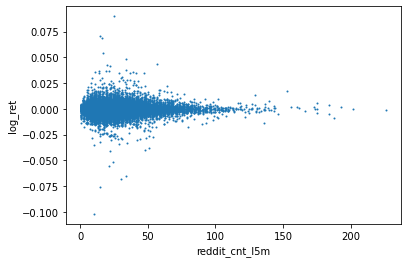

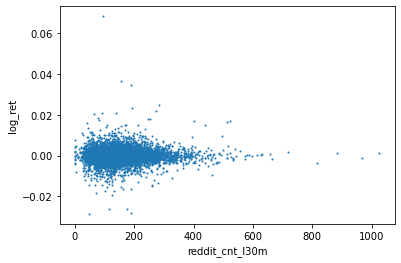

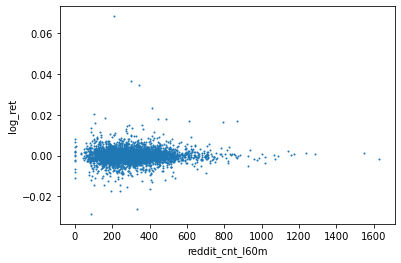

In [24]:
BTC2.plot.scatter(x = 'reddit_cnt_l5m', y = 'log_ret', s = 1);
BTC2.plot.scatter(x = 'reddit_cnt_l30m', y = 'log_ret', s = 1);
BTC2.plot.scatter(x = 'reddit_cnt_l60m', y = 'log_ret', s = 1);

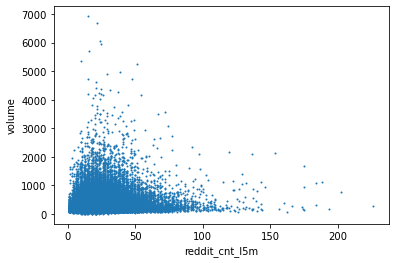

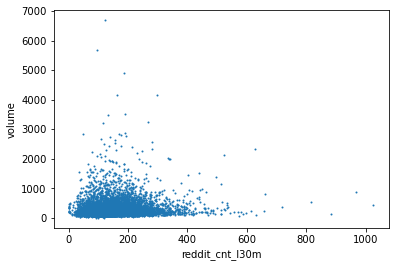

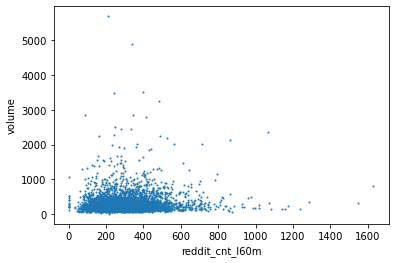

In [25]:
BTC2.plot.scatter(x = 'reddit_cnt_l5m', y = 'volume', s = 1);
BTC2.plot.scatter(x = 'reddit_cnt_l30m', y = 'volume', s = 1);
BTC2.plot.scatter(x = 'reddit_cnt_l60m', y = 'volume', s = 1);

In [26]:
BTC2[['reddit_cnt_l5m', 'reddit_cnt_l30m', 'reddit_cnt_l60m', 'log_ret', 'volume']].corr()

,reddit_cnt_l5m,reddit_cnt_l30m,reddit_cnt_l60m,log_ret,volume
reddit_cnt_l5m,1.000000,0.854377,0.788267,0.003132,0.067284
reddit_cnt_l30m,0.854377,1.000000,0.946650,0.013416,0.069272
reddit_cnt_l60m,0.788267,0.946650,1.000000,0.012380,0.063844
log_ret,0.003132,0.013416,0.012380,1.000000,-0.021611
volume,0.067284,0.069272,0.063844,-0.021611,1.000000


In [27]:
from datetime import date
redditDataTrain = redditData.loc[(redditData.created_date >= date(2020,12,31)) & 
                                 (redditData.created_date <= date(2022,7,1)) #& (redditData.score>=5)
                                ]

In [22]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-08-09 18:51:12,594 loading file C:\Users\ricky\.flair\models\sentiment-en-mix-distillbert_4.pt


In [23]:
sentence = flair.data.Sentence("the weather is bad")
sentence

Sentence: "the weather is bad"

In [24]:
sentiment_model.predict(sentence)
sentence

Sentence: "the weather is bad" → NEGATIVE (0.9954)

In [26]:
redditDataTrain.shape

(3393131, 9)

In [27]:
redditData.loc[(redditData.created_date >= date(2020,12,31)) & 
                                 (redditData.created_date <= date(2022,7,1)) & 
                                 (redditData.score>=5)].shape[0]

675816

In [62]:
probs = []
sentiments = []

for i,tweet in enumerate(redditDataTrain['body']):
    #print(i)
    sentence = flair.data.Sentence(tweet)
    sentiment_model.predict(sentence)
    probs.append(sentence.labels[0].score)
    sentiments.append(sentence.labels[0].value)



In [223]:
redditDataTrain.iloc[[i]]['body']

'\u200c'

In [ ]:
redditDataTrain.iloc[i]['body']

In [64]:
redditDataTrain['probability'] = probs
redditDataTrain['sentiment'] = sentiments

C:\Users\ricky\AppData\Local\Temp\ipykernel_10640\113190295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redditDataTrain['probability'] = probs
C:\Users\ricky\AppData\Local\Temp\ipykernel_10640\113190295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redditDataTrain['sentiment'] = sentiments


In [65]:
redditDataTrain.to_pickle('redditDataTrainF.pkl')

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [34]:
vader_sentiment_model = SentimentIntensityAnalyzer()
vader_sentiment_model.polarity_scores('The weather is bad!')

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5848}

In [39]:
probs = []
sentiments = []

for i,tweet in enumerate(redditDataTrain['body']):
    #print(i)
    sentence = vader_sentiment_model.polarity_scores(tweet)
    vader_sentiment_model.polarity_scores
    probs.append(sentence)       



In [37]:
vader_sentiment_model.polarity_scores(redditDataTrain.iloc[1]['body'])['compound']

0.0

In [46]:
redditDataTrain['compound'] = [p['compound'] for p in probs]
def sent(x):
    if x>0:return 'POSITIVE'
    if x<0:return 'NEGATIVE'
    return 'NEUTRAL'
redditDataTrain['sentiment'] = [sent(p['compound']) for p in probs]


C:\Users\ricky\AppData\Local\Temp\ipykernel_2252\2152131212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redditDataTrain['compound'] = [p['compound'] for p in probs]
C:\Users\ricky\AppData\Local\Temp\ipykernel_2252\2152131212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redditDataTrain['sentiment'] = [sent(p['compound']) for p in probs]


In [47]:
redditDataTrain

,score,body,created,created_date,created_time,created_datetime,created_datetime_5m,created_datetime_30m,created_datetime_60m,compound,sentiment
613,1,"I'm sorry, but I set a reminder, and this hurt...",1.609451e+09,2020-12-31,21:41:44,2020-12-31 21:41:44,2020-12-31 21:44:59.999,2020-12-31 21:59:59.999,2020-12-31 21:59:59.999,-0.7259,NEGATIVE
720,1,Unlikely,1.612948e+09,2021-02-10,09:06:05,2021-02-10 09:06:05,2021-02-10 09:09:59.999,2021-02-10 09:29:59.999,2021-02-10 09:59:59.999,0.0000,NEUTRAL
1052,2,Thank you (sincerely) -- this comment saved me...,1.609866e+09,2021-01-05,17:04:34,2021-01-05 17:04:34,2021-01-05 17:04:59.999,2021-01-05 17:29:59.999,2021-01-05 17:59:59.999,0.8126,POSITIVE
1210,2,Cheers. Happy to be helpful.,1.609868e+09,2021-01-05,17:38:03,2021-01-05 17:38:03,2021-01-05 17:39:59.999,2021-01-05 17:59:59.999,2021-01-05 17:59:59.999,0.8625,POSITIVE
2857,2,Thank you! Very cool of you. I also managed to...,1.609389e+09,2020-12-31,04:25:04,2020-12-31 04:25:04,2020-12-31 04:29:59.999,2020-12-31 04:29:59.999,2020-12-31 04:59:59.999,0.6885,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...
5807,1,"When i'll enter again, i'll definetely buy som...",1.652106e+09,2022-05-09,14:27:11,2022-05-09 14:27:11,2022-05-09 14:29:59.999,2022-05-09 14:29:59.999,2022-05-09 14:59:59.999,0.0000,NEUTRAL
5808,1,Not worth the risk imo but that’s your money s...,1.652163e+09,2022-05-10,06:04:21,2022-05-10 06:04:21,2022-05-10 06:04:59.999,2022-05-10 06:29:59.999,2022-05-10 06:59:59.999,0.8911,POSITIVE
5809,1,LoL 🤣,1.652120e+09,2022-05-09,18:12:55,2022-05-09 18:12:55,2022-05-09 18:14:59.999,2022-05-09 18:29:59.999,2022-05-09 18:59:59.999,0.7184,POSITIVE
5810,1,well you're just causing fud and its annoying,1.652108e+09,2022-05-09,14:56:18,2022-05-09 14:56:18,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,-0.4019,NEGATIVE


In [48]:
redditDataTrain.to_pickle('redditDataTrain_vader.pkl')

In [1]:
from transformers import pipeline

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
torch.__version__

'1.12.1+cu116'

In [4]:
transformers_classifier = pipeline('sentiment-analysis', model = 'distilbert-base-uncased-finetuned-sst-2-english',device = 0)

In [28]:
transformers_classifier('The weather is bad!', truncation = True)

[{'label': 'NEGATIVE', 'score': 0.9997956156730652}]

In [37]:
probs = []
sentiments = []

for i,tweet in enumerate(redditDataTrain['body']):
    #print(i)
    sentence = transformers_classifier(tweet, truncation = True)
    probs.append(sentence[0]['score'])       
    sentiments.append(sentence[0]['label'])       



C:\Users\ricky\Anaconda3\lib\site-packages\transformers\pipelines\base.py:1012: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [38]:
redditDataTrain['probability'] = probs
redditDataTrain['sentiment'] = sentiments

C:\Users\ricky\AppData\Local\Temp\ipykernel_8812\113190295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redditDataTrain['probability'] = probs
C:\Users\ricky\AppData\Local\Temp\ipykernel_8812\113190295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redditDataTrain['sentiment'] = sentiments


In [39]:
redditDataTrain

,score,body,created,created_date,created_time,created_datetime,created_datetime_5m,created_datetime_30m,created_datetime_60m,probability,sentiment
613,1,"I'm sorry, but I set a reminder, and this hurt...",1.609451e+09,2020-12-31,21:41:44,2020-12-31 21:41:44,2020-12-31 21:44:59.999,2020-12-31 21:59:59.999,2020-12-31 21:59:59.999,0.999424,NEGATIVE
720,1,Unlikely,1.612948e+09,2021-02-10,09:06:05,2021-02-10 09:06:05,2021-02-10 09:09:59.999,2021-02-10 09:29:59.999,2021-02-10 09:59:59.999,0.851612,POSITIVE
1052,2,Thank you (sincerely) -- this comment saved me...,1.609866e+09,2021-01-05,17:04:34,2021-01-05 17:04:34,2021-01-05 17:04:59.999,2021-01-05 17:29:59.999,2021-01-05 17:59:59.999,0.999500,POSITIVE
1210,2,Cheers. Happy to be helpful.,1.609868e+09,2021-01-05,17:38:03,2021-01-05 17:38:03,2021-01-05 17:39:59.999,2021-01-05 17:59:59.999,2021-01-05 17:59:59.999,0.999858,POSITIVE
2857,2,Thank you! Very cool of you. I also managed to...,1.609389e+09,2020-12-31,04:25:04,2020-12-31 04:25:04,2020-12-31 04:29:59.999,2020-12-31 04:29:59.999,2020-12-31 04:59:59.999,0.999050,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...
5807,1,"When i'll enter again, i'll definetely buy som...",1.652106e+09,2022-05-09,14:27:11,2022-05-09 14:27:11,2022-05-09 14:29:59.999,2022-05-09 14:29:59.999,2022-05-09 14:59:59.999,0.503309,NEGATIVE
5808,1,Not worth the risk imo but that’s your money s...,1.652163e+09,2022-05-10,06:04:21,2022-05-10 06:04:21,2022-05-10 06:04:59.999,2022-05-10 06:29:59.999,2022-05-10 06:59:59.999,0.998532,POSITIVE
5809,1,LoL 🤣,1.652120e+09,2022-05-09,18:12:55,2022-05-09 18:12:55,2022-05-09 18:14:59.999,2022-05-09 18:29:59.999,2022-05-09 18:59:59.999,0.971981,NEGATIVE
5810,1,well you're just causing fud and its annoying,1.652108e+09,2022-05-09,14:56:18,2022-05-09 14:56:18,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,0.999683,NEGATIVE


In [40]:
redditDataTrain.to_pickle('redditDataTrain_transformer.pkl')